C:\Users\DANIEL\AppData\Local\Temp\ipykernel_11132\145943957.py:22: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  w = lp.Queen.from_dataframe(gdf)


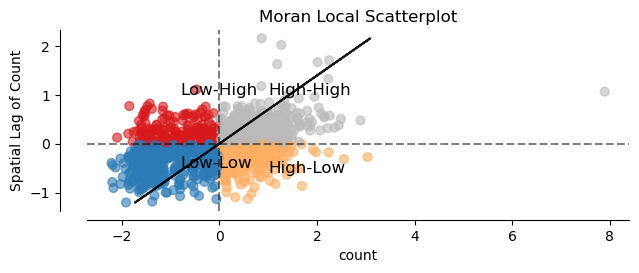

In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
import libpysal.weights as lp
import esda
import matplotlib.pyplot as plt
from splot.esda import moran_scatterplot, lisa_cluster
from esda.moran import Moran_Local  # Import Moran_Local from esda

# Step 1: Load your data
fire_n = pd.read_csv("fire_n2.csv")
# Assuming you have a DataFrame or a GeoDataFrame containing your data
# Replace this with your actual data loading process
data = fire_n

# Step 2: Create a GeoDataFrame if your data has spatial information
# Assuming you have latitude and longitude columns
gdf = gpd.GeoDataFrame(data, geometry=gpd.points_from_xy(data.longitude, data.latitude))

# Step 3: Create a spatial weights matrix
# Here, we'll use Queen contiguity as an example
w = lp.Queen.from_dataframe(gdf)
#w = lp.weights.DistanceBand.from_dataframe(gdf, k=5)

# Step 4: Calculate Local Moran's I
# Assuming you have a variable named 'value' representing your attribute
moran_loc = esda.moran.Moran_Local(data['bright_t31'], w)

fig, ax = moran_scatterplot(moran_loc, p=2)
ax.set_xlabel('count')
ax.set_ylabel('Spatial Lag of Count')
plt.text(-0.8, 1, 'Low-High', fontsize=12)
plt.text(1, -0.6, 'High-Low', fontsize=12)
plt.text(-0.8, -0.5, 'Low-Low', fontsize=12)
plt.text(1, 1, 'High-High', fontsize=12)
plt.show()

In [4]:
from splot.esda import moran_scatterplot, lisa_cluster
from esda.moran import Moran_Local

from libpysal.weights.contiguity import Queen
from libpysal import examples
from esda.moran import Moran
from splot.esda import moran_scatterplot
from esda.moran import Moran_Local

import geopandas as gpd
import libpysal.weights as weights

%matplotlib inline

In [5]:
# Assuming you have latitude and longitude columns
gdf = gpd.GeoDataFrame(data, geometry=gpd.points_from_xy(data.longitude, data.latitude))

In [6]:
from esda.moran import Moran

count = data['bright_t31'].values
y = count

#w = weights.distance.DistanceBand.from_dataframe(gdf_year, 1.5, binary=True)
#w = weights.distance.KNN.from_dataframe(gdf, k=4)
#w = weights.distance.Kernel.from_dataframe(gdf_year)
w = Queen.from_dataframe(gdf)
w.transform = 'r'

moran = Moran(y, w)
moran.I

C:\Users\DANIEL\AppData\Local\Temp\ipykernel_6748\17465019.py:9: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  w = Queen.from_dataframe(gdf)


0.24730642949988238

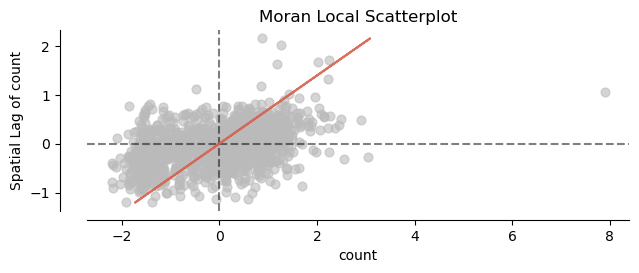

In [7]:
from splot.esda import moran_scatterplot
from esda.moran import Moran_Local

# calculate Moran_Local and plot
moran_loc = Moran_Local(y, w)
fig, ax = moran_scatterplot(moran_loc)
ax.set_xlabel('count')
ax.set_ylabel('Spatial Lag of count')
plt.show()

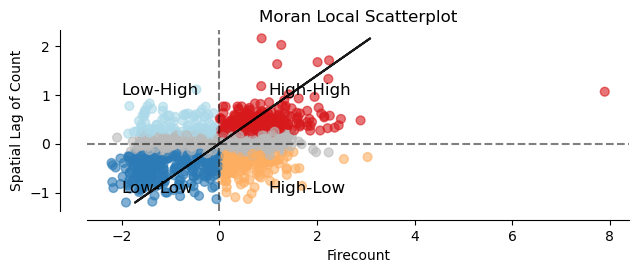

In [8]:
fig, ax = moran_scatterplot(moran_loc, p=0.25)
ax.set_xlabel('Firecount')
ax.set_ylabel('Spatial Lag of Count')
plt.text(-2, 1, 'Low-High', fontsize=12)
plt.text(1, -1, 'High-Low', fontsize=12)
plt.text(-2, -1, 'Low-Low', fontsize=12)
plt.text(1, 1, 'High-High', fontsize=12)
plt.title("Moran Local Scatterplot")

#plt.savefig("MoranPlotQueen", dpi =300, bbox_inches = 'tight')
#plt.savefig("MoranPlotKNN", dpi =300, bbox_inches = 'tight')
plt.show()


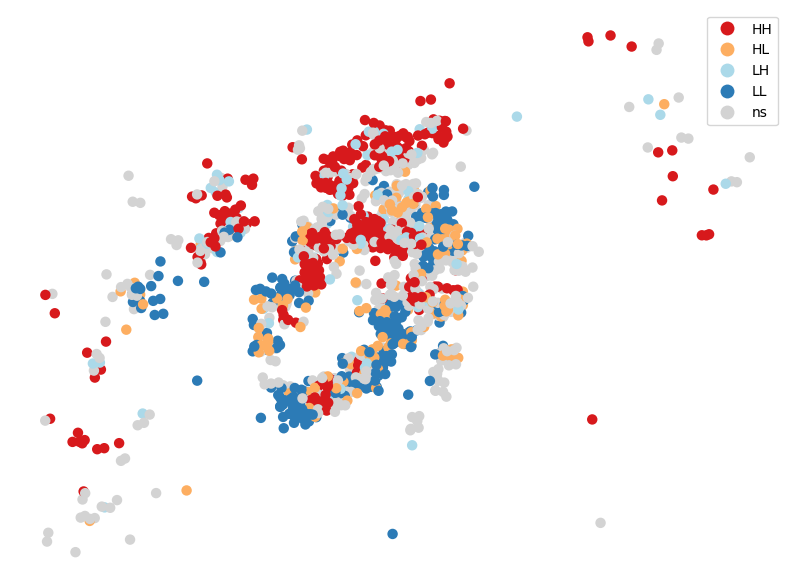

In [9]:
from splot.esda import lisa_cluster

#lisa_cluster(moran_loc, gdf_year, p=0.05, figsize = (10,10))

lisa_cluster(moran_loc, gdf, p=0.25, figsize = (10,10))

plt.show()

In [10]:
import geopandas as gpd

mt_kenya_shape = gpd.read_file("True_forest.shp")


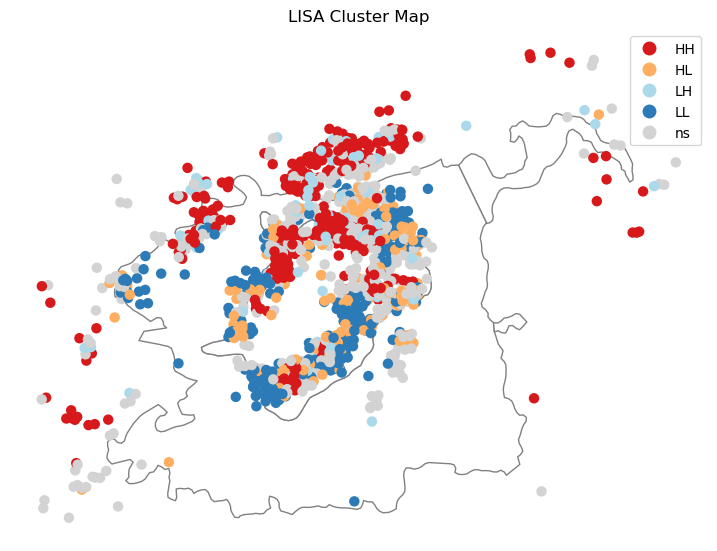

In [11]:
import geopandas as gpd

mt_kenya_shape = gpd.read_file("True_forest.shp")


# Plot the original shapefile
fig, ax = plt.subplots(figsize=(9, 9))
mt_kenya_shape.plot(ax=ax, color='white', edgecolor='gray')

# Plot the LISA cluster map
#lisa_cluster(moran_loc, gdf_year, p=0.05, figsize=(9, 9), ax=ax)
lisa_cluster(moran_loc, gdf, p=0.25, figsize=(9, 9), ax=ax)

#plt.title('LISA Cluster Map(Queen)')
plt.title('LISA Cluster Map')
plt.show()

In [13]:
import geopandas as gpd
#from pysal.explore.esda import moran
#from pysal.lib.weights import Queen
import pandas as pd

# Load your GeoDataFrame (gdf) containing spatial data
#gdf = gpd.read_file('your_shapefile.shp')

# Calculate spatial weights (assuming you are using Queen's contiguity)
#w = Queen.from_dataframe(gdf)

# Calculate Moran's I and detect significant clusters
#moran_loc = moran.Moran_Local(your_variable, w)

# Add LISA labels to the GeoDataFrame
gdf['LISA_cluster'] = moran_loc.q

# Classification of Fire Occurrences based on LISA labels
def classify_fire_occurrences(label):
    if label == 1:  # Modify conditions based on your LISA labels
        return 'HH'
    elif label == 2:
        return 'LH'
    elif label == 3:
        return 'LL'
    elif label == 4:
        return 'HL'
    else:
        return 'Unknown'

# Apply classification function to create a new column 'Fire_Classification'
gdf['Fire_Classification'] = gdf['LISA_cluster'].apply(classify_fire_occurrences)

# Display a sample of the classified data
print(gdf[['LISA_cluster', 'Fire_Classification']].head())

# Continue with your analysis or save the updated data as needed
# For example, save as a CSV file
gdf.to_csv('classified_data.csv', index=False)


   LISA_cluster Fire_Classification
0             4                  HL
1             2                  LH
2             2                  LH
3             3                  LL
4             3                  LL


In [2]:
import pandas as pd
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Load the classified data (assuming it's already classified and saved as a CSV)
classified_data = pd.read_csv('classified_data.csv')

# Load the weather data (assuming it's in a separate CSV file)
weather_data = pd.read_csv("Yearly_Thresholds_Mt_Kenya_Forest2.csv")

# Merge the classified data with weather data based on a common identifier
# Assuming 'fire_id' is the common identifier between the two datasets
combined_data = pd.merge(classified_data, weather_data, on='YEAR')
combined_data.head()
    


,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,...,month,day,ANN_x,monthly_fire_occurrence,geometry,LISA_cluster,Fire_Classification,system:index,ANN_y,.geo
0,0.2122,37.7333,335.9,1.0,1.0,8/11/2001,801,Terra,MODIS,83,...,8,11,21,2,POINT (37.7333 0.2122),4,HL,1,0.514756,"{""type"":""MultiPoint"",""coordinates"":[]}"
1,0.1272,37.5555,301.7,1.5,1.2,8/11/2001,2023,Terra,MODIS,43,...,8,11,21,2,POINT (37.5555 0.1272),2,LH,1,0.514756,"{""type"":""MultiPoint"",""coordinates"":[]}"
2,-0.0990,37.4320,313.7,3.8,1.8,9/13/2001,843,Terra,MODIS,25,...,9,13,21,13,POINT (37.432 -0.099),2,LH,1,0.514756,"{""type"":""MultiPoint"",""coordinates"":[]}"
3,-0.1280,37.4616,339.6,3.9,1.8,9/13/2001,843,Terra,MODIS,90,...,9,13,21,13,POINT (37.4616 -0.128),3,LL,1,0.514756,"{""type"":""MultiPoint"",""coordinates"":[]}"
4,-0.1350,37.4570,316.7,3.9,1.8,9/13/2001,843,Terra,MODIS,59,...,9,13,21,13,POINT (37.457 -0.135),3,LL,1,0.514756,"{""type"":""MultiPoint"",""coordinates"":[]}"


In [31]:
import pandas as pd

# Load your datasets (example data)

weather_data1 = pd.read_csv("RELATIVE HUMIDITY.csv")
precipitation_data = pd.read_csv("Precipitation.csv")
#precipitation_data2 = pd.read_csv("Monthly_Precipitation_Mt_Kenya_Forest.csv")
landsurface_temp = pd.read_csv("LST.csv")
temp = pd.read_csv("Earth SKIN Temp.csv")
relative_humidity = pd.read_csv("Relative_Humidity.csv")
specific_humidity = pd.read_csv("Specific_Humidity.csv")
soilwetness_surface = pd.read_csv("SoilWetness_Surface.csv")
soilwetness_rootzone = pd.read_csv("SoilWetness_Rootzone.csv")
wind_direction = pd.read_csv("Wind_Direction.csv")
wind_speed = pd.read_csv("Wind_Speed.csv")
yearly_NDVI = pd.read_csv("Yearly_Thresholds_Mt_Kenya_Forest2.csv")
#monthly_NDVI = pd.read_csv("Monthly_NDVI_Mt_Kenya_Forest.csv")




# Merge the first pair of datasets based on a common identifier (e.g., 'fire_id')
combined_data = pd.merge(classified_data, yearly_NDVI, on='YEAR', suffixes=('_1', '_2'))

# Merge the combined data with weather data based on a common identifier (e.g., 'YEAR')
#combined_data = pd.merge(combined_data,relative_humidity, on='YEAR')
#combined_data = pd.merge(combined_data, temp, on='YEAR')
#combined_data = pd.merge(combined_data, precipitation_data, on='YEAR')



# Print the first few rows of the combined data to check
print(combined_data.head())


   latitude  longitude  brightness  scan  track   acq_date  acq_time  \
0    0.2122    37.7333       335.9   1.0    1.0  8/11/2001       801   
1    0.1272    37.5555       301.7   1.5    1.2  8/11/2001      2023   
2   -0.0990    37.4320       313.7   3.8    1.8  9/13/2001       843   
3   -0.1280    37.4616       339.6   3.9    1.8  9/13/2001       843   
4   -0.1350    37.4570       316.7   3.9    1.8  9/13/2001       843   

  satellite instrument  confidence  ...  month  day  ANN_1  \
0     Terra      MODIS          83  ...      8   11     21   
1     Terra      MODIS          43  ...      8   11     21   
2     Terra      MODIS          25  ...      9   13     21   
3     Terra      MODIS          90  ...      9   13     21   
4     Terra      MODIS          59  ...      9   13     21   

  monthly_fire_occurrence                geometry  LISA_cluster  \
0                       2  POINT (37.7333 0.2122)             4   
1                       2  POINT (37.5555 0.1272)           

In [33]:
# Prepare data for modeling
X = combined_data.drop(columns=['brightness', 'bright_t31','scan', 'track','confidence','frp','acq_date','satellite','instrument','version','geometry','.geo','Fire_Classification','daynight'])
y = combined_data['ANN_1']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Boosted Regression Tree model
model = GradientBoostingRegressor()
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5

print(f'Mean Squared Error: {mse}')
print("Root Mean Squared Error:", rmse)

# Save the trained model for future use
import joblib
joblib.dump(model, 'brt_model.pkl')


Mean Squared Error: 2.022743222834509e-05
Root Mean Squared Error: 0.00449749177079237


['brt_model.pkl']

In [28]:
# Now, perform binning based on centroids after seeing the LISA cluster map
mt_kenya_shape['centroid'] = mt_kenya_shape.geometry.centroid
centroids_x = mt_kenya_shape['centroid'].x
centroids_y = mt_kenya_shape['centroid'].y

# Calculate the range of latitude and longitude based on centroids
lat_min, lat_max = centroids_y.min(), centroids_y.max()
lon_min, lon_max = centroids_x.min(), centroids_x.max()

# Calculate the number of bins based on centroid latitude and longitude ranges
num_bins_lat = int(lat_max - lat_min) + 1
num_bins_lon = int(lon_max - lon_min) + 1

# Bin data using centroids
bin_counts, x_edges, y_edges, bin_number = binned_statistic_2d(
    centroids_x, centroids_y, mt_kenya_shape['centroid'], statistic='count', bins=[num_bins_lon, num_bins_lat]
)

# Optionally, remove the temporary 'centroid' column
mt_kenya_shape.drop('centroid', axis=1, inplace=True)

# Now you have your binned data ready for further analysis or visualization

C:\Users\DANIEL\AppData\Local\Temp\ipykernel_14056\1617225873.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  mt_kenya_shape['centroid'] = mt_kenya_shape.geometry.centroid


C:\Users\DANIEL\AppData\Local\Temp\ipykernel_14056\1467169242.py:12: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  w = Queen.from_dataframe(mt_kenya_shape)
C:\Users\DANIEL\AppData\Local\Temp\ipykernel_14056\1467169242.py:18: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  w = Queen.from_dataframe(gdf)


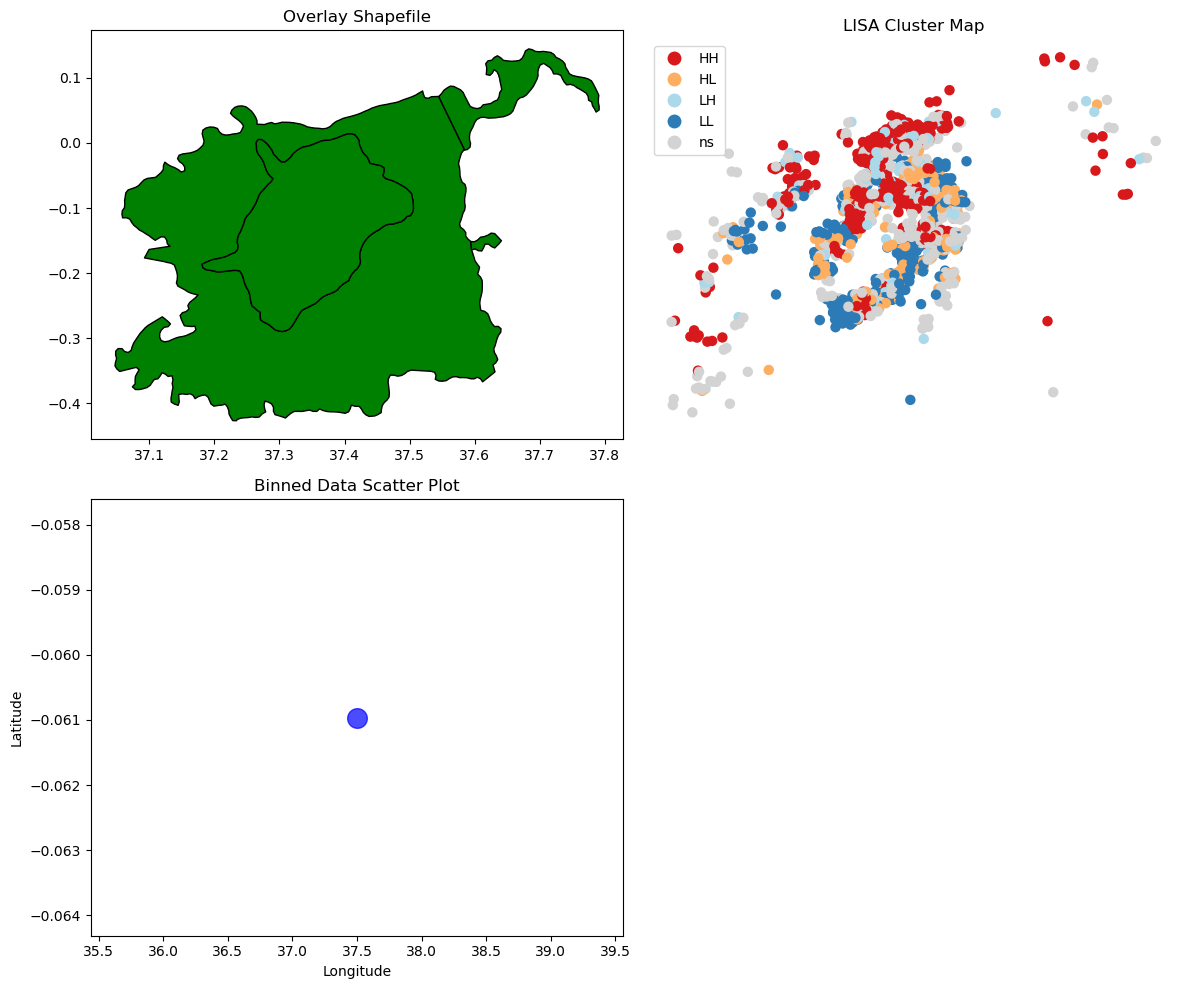

In [45]:
import geopandas as gpd
import numpy as np
from scipy.stats import binned_statistic_2d
import matplotlib.pyplot as plt
from pysal.explore import esda
from libpysal.weights.contiguity import Queen

# Load your shapefile and prepare data (assuming 'mt_kenya_shape' is your GeoDataFrame)
mt_kenya_shape = gpd.read_file("True_forest.shp")

# Calculate spatial weights (Queen for example)
w = Queen.from_dataframe(mt_kenya_shape)

# Calculate spatial autocorrelation
#moran_loc = esda.Moran_Local(mt_kenya_shape['HH'], w)
count = data['bright_t31'].values
y = count
w = Queen.from_dataframe(gdf)
w.transform = 'r'




moran_loc = Moran_Local(y, w)

# Calculate the bin centers for plotting
x_centers = (x_edges[:-1] + x_edges[1:]) / 2
y_centers = (y_edges[:-1] + y_edges[1:]) / 2

# Create a figure and subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Plot the overlay shapefile
mt_kenya_shape.plot(ax=axs[0, 0], color='green', edgecolor='black')
axs[0, 0].set_title('Overlay Shapefile')

# Plot the LISA cluster map
axs[0, 1].set_title('LISA Cluster Map')
# Plot the LISA cluster map using your function (assuming lisa_cluster is defined elsewhere)
mt_kenya_shape.plot(ax=ax, color='white', edgecolor='gray')

lisa_cluster(moran_loc, gdf, p=0.25, figsize=(6, 5), ax=axs[0, 1],)

# Plot the binned data scatter plot
axs[1, 0].scatter(x_centers.flatten(), y_centers.flatten(), s=bin_counts.flatten() * 50, c='blue', alpha=0.7)
axs[1, 0].set_title('Binned Data Scatter Plot')
axs[1, 0].set_xlabel('Longitude')
axs[1, 0].set_ylabel('Latitude')

# Remove empty subplot
fig.delaxes(axs[1, 1])

plt.tight_layout()
plt.show()


In [6]:
import numpy as np
import pandas as pd

# Assuming 'fire_data' is your DataFrame with latitude, longitude, and 'HH' column
# Create sample fire data (replace this with your actual data)
np.random.seed(0)
num_samples = 1000
fire_data = pd.DataFrame({
    'latitude': np.random.uniform(-1, 1, num_samples) * 10 + 37,  # Example latitude range
    'longitude': np.random.uniform(-1, 1, num_samples) * 10 + 0,  # Example longitude range
    'bright_t31': np.random.randint(1, 10, num_samples)  # Example 'HH' data (fire intensity or count)
})

# Define the grid boundaries and grid size
lat_min, lat_max = fire_data['latitude'].min(), fire_data['latitude'].max()
lon_min, lon_max = fire_data['longitude'].min(), fire_data['longitude'].max()
grid_size = 0.1  # Adjust the grid size as needed

# Create meshgrid for latitude and longitude
lat_grid, lon_grid = np.meshgrid(np.arange(lat_min, lat_max + grid_size, grid_size),
                                 np.arange(lon_min, lon_max + grid_size, grid_size))

# Initialize grid of zeros for bin counts
bin_counts = np.zeros_like(lat_grid)

# Assign counts to grid cells based on fire data
for lat, lon, count in zip(fire_data['latitude'], fire_data['longitude'], fire_data['bright_t31']):
    lat_index = int((lat - lat_min) // grid_size)
    lon_index = int((lon - lon_min) // grid_size)
    bin_counts[lat_index, lon_index] += count

# Flatten the arrays for saving to CSV
flat_lat_grid = lat_grid.flatten()
flat_lon_grid = lon_grid.flatten()
flat_bin_counts = bin_counts.flatten()

# Create DataFrame with binned data
binned_data = pd.DataFrame({'Latitude': flat_lat_grid, 'Longitude': flat_lon_grid, 'Count': flat_bin_counts})

# Save to CSV
binned_data.to_csv('binned_data_meshgrid.csv', index=False)
print("Binned data saved to 'binned_data_meshgrid.csv'")


Binned data saved to 'binned_data_meshgrid.csv'


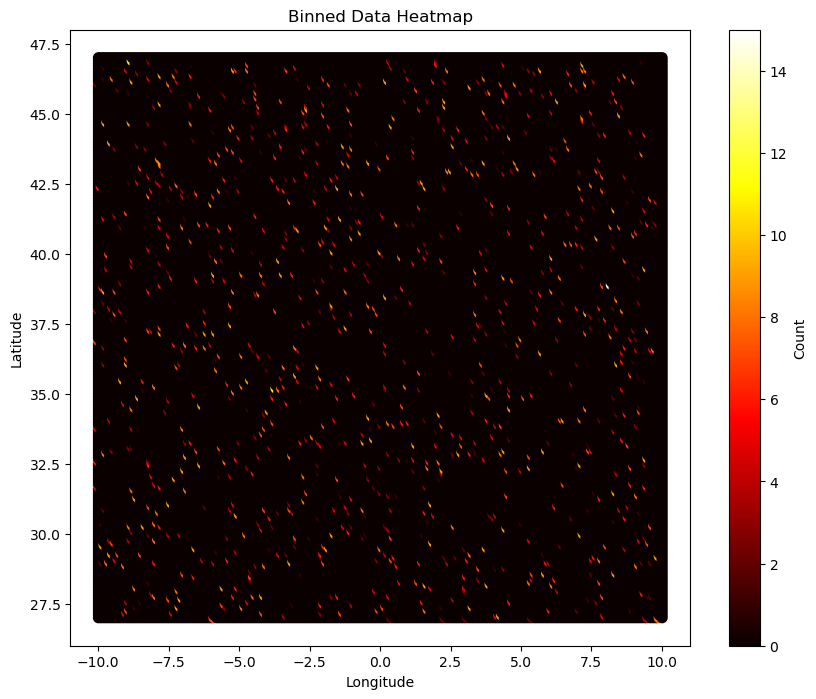

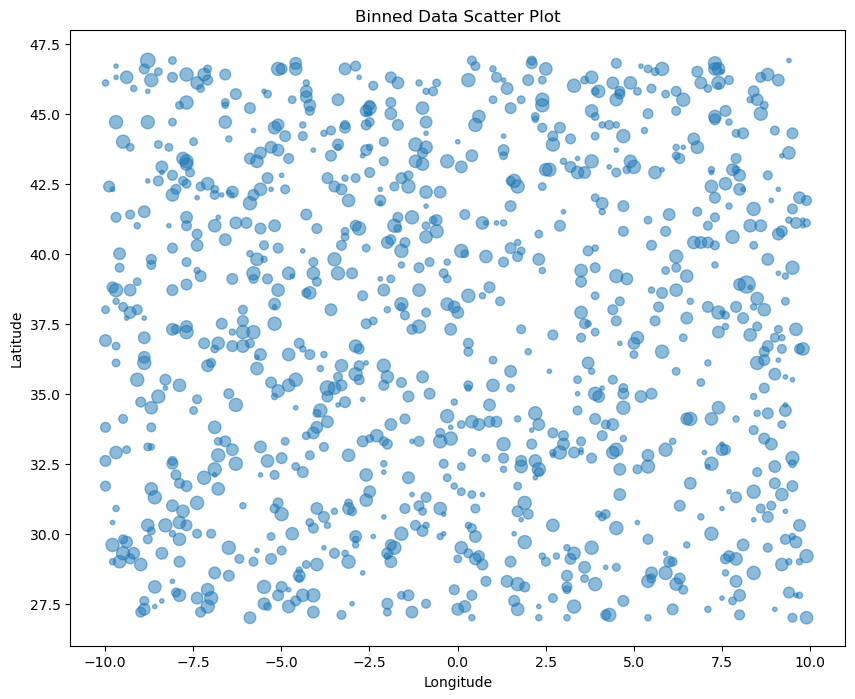

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the binned data from the CSV file
binned_data = pd.read_csv('binned_data_meshgrid.csv')

# Extract the latitude, longitude, and count columns from the DataFrame
latitudes = binned_data['Latitude']
longitudes = binned_data['Longitude']
counts = binned_data['Count']

# Create a heatmap of the binned data
plt.figure(figsize=(10, 8))
plt.scatter(longitudes, latitudes, c=counts, cmap='hot', s=50)
plt.colorbar(label='Count')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Binned Data Heatmap')
plt.show()

# Create a scatter plot of the binned data
plt.figure(figsize=(10, 8))
plt.scatter(longitudes, latitudes, s=counts * 10, alpha=0.5)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Binned Data Scatter Plot')
plt.show()


C:\Users\DANIEL\anaconda3\Lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


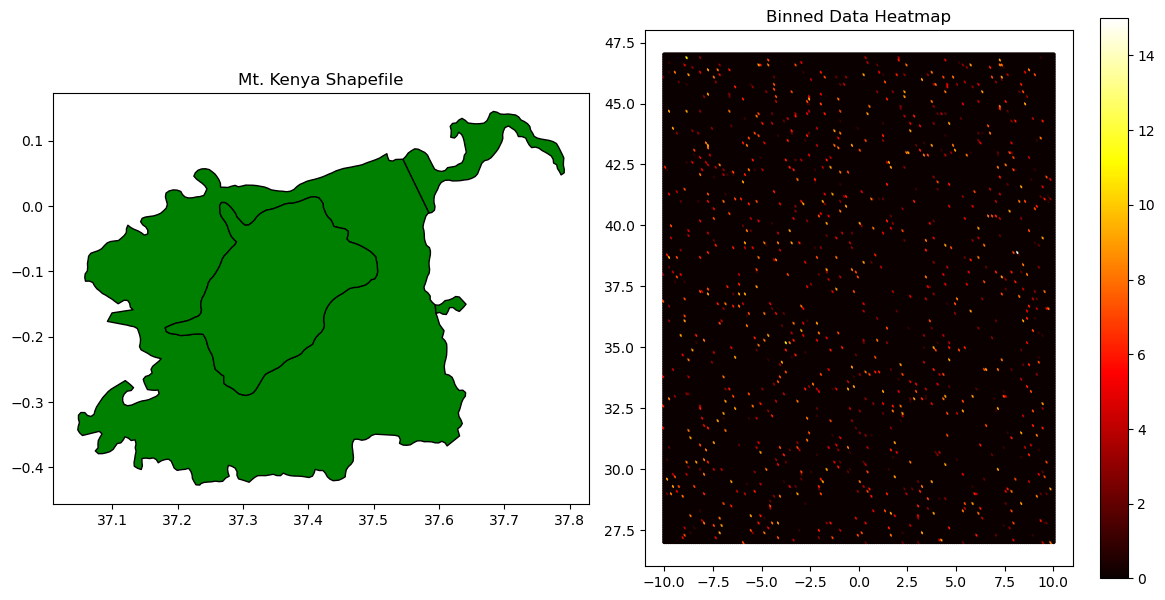

In [8]:
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import Point

# Load your shapefile (assuming 'mt_kenya_shape' is your GeoDataFrame)
mt_kenya_shape = gpd.read_file("True_forest.shp")

# Load the binned data from the CSV file
binned_data = pd.read_csv('binned_data_meshgrid.csv')

# Create a GeoDataFrame from the binned data
geometry = [Point(xy) for xy in zip(binned_data['Longitude'], binned_data['Latitude'])]
crs = {'init': 'epsg:4326'}  # Assuming WGS84 coordinate system
binned_geo_df = gpd.GeoDataFrame(binned_data, crs=crs, geometry=geometry)

# Create subplots with the shapefile and binned data
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot the shapefile on the first subplot
mt_kenya_shape.plot(ax=axs[0], color='green', edgecolor='black')
axs[0].set_title('Mt. Kenya Shapefile')

# Plot the binned data on the second subplot
binned_geo_df.plot(ax=axs[1], column='Count', cmap='hot', legend=True, markersize=5)
axs[1].set_title('Binned Data Heatmap')

plt.tight_layout()
plt.show()


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Load fire data and weather data
fire_data = pd.read_csv('classified_data2.csv')
weather_data = pd.read_csv('Precipitation2.csv')


#weather_data1 = pd.read_csv("RELATIVE HUMIDITY.csv")
#precipitation_data2 = pd.read_csv("Monthly_Precipitation_Mt_Kenya_Forest.csv")
landsurface_temp = pd.read_csv("LST2.csv")
temp = pd.read_csv("Earth SKIN Temp2.csv")
relative_humidity = pd.read_csv("Relative_Humidity2.csv")
specific_humidity = pd.read_csv("Specific_Humidity2.csv")
soilwetness_surface = pd.read_csv("SoilWetness_Surface2.csv")
soilwetness_rootzone = pd.read_csv("SoilWetness_Rootzone2.csv")
wind_direction = pd.read_csv("Wind_Direction2.csv")
wind_speed = pd.read_csv("Wind_Speed2.csv")
yearly_NDVI = pd.read_csv("Yearly_Thresholds_Mt_Kenya_Forest22.csv")
#monthly_NDVI = pd.read_csv("Monthly_NDVI_Mt_Kenya_Forest.csv")



# Merge datasets based on common columns

merged_data = pd.merge(fire_data, weather_data, on=['YEAR'])
merged_data = pd.merge(merged_data, landsurface_temp, on=['YEAR'])
merged_data = pd.merge(merged_data, temp, on=['YEAR'])
merged_data = pd.merge(merged_data, relative_humidity, on=['YEAR']) 
merged_data = pd.merge(merged_data, specific_humidity, on=['YEAR'])
merged_data = pd.merge(merged_data, yearly_NDVI, on=['YEAR'])
#merged_data = pd.merge(merged_data, soilwetness_surface, on=['YEAR']) 
#merged_data = pd.merge(merged_data, soilwetness_rootzone, on=['YEAR']) 
#merged_data = pd.merge(merged_data, wind_direction, on=['YEAR']) 
#merged_data = pd.merge(merged_data, wind_speed, on=['YEAR']) 


# Feature selection
features = ['latitude','longitude','YEAR','month','day','Precipitation', 'LST', 'TS', 'RelaHum', 'Spechum', 'NDVI']  # Add relevant features
#features = ['latitude','longitude','YEAR','month','day','Precipitation', 'Wetsurface','Wetroot','Wdirection', 'Wspeed']

X = merged_data[features]
y = merged_data['ANN']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Model evaluation
y_pred = rf_classifier.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))



# Predict for future years (2021-2027)
#future_weather_data = pd.read_csv('path_to_future_weather_data.csv')  # Assuming you have future weather data
#X_future = future_weather_data[features]  # Use the same features as in training
#future_predictions = rf_classifier.predict(X_future)

# Add future predictions to your dataset or save them as needed
#future_weather_data['Fire_Prediction'] = future_predictions
#future_weather_data.to_csv('future_predictions.csv', index=False)


              precision    recall  f1-score   support

          16       1.00      1.00      1.00     24960
          17       1.00      1.00      1.00     26246
          20       1.00      1.00      1.00     31017
          21       1.00      1.00      1.00     32648
          22       1.00      1.00      1.00     33932
          23       1.00      1.00      1.00     35762
          27       1.00      1.00      1.00     41712
          31       1.00      1.00      1.00     47999
          32       1.00      1.00      1.00     49879
          33       1.00      1.00      1.00     51040
          36       1.00      1.00      1.00    112578
          39       1.00      1.00      1.00     60968
          51       1.00      1.00      1.00    159208
          73       1.00      1.00      1.00    113290
          75       1.00      1.00      1.00    116925
          88       1.00      1.00      1.00    136490
          96       1.00      1.00      1.00    149461
         102       1.00    

MSE: 0.0
RMSE: 0.0


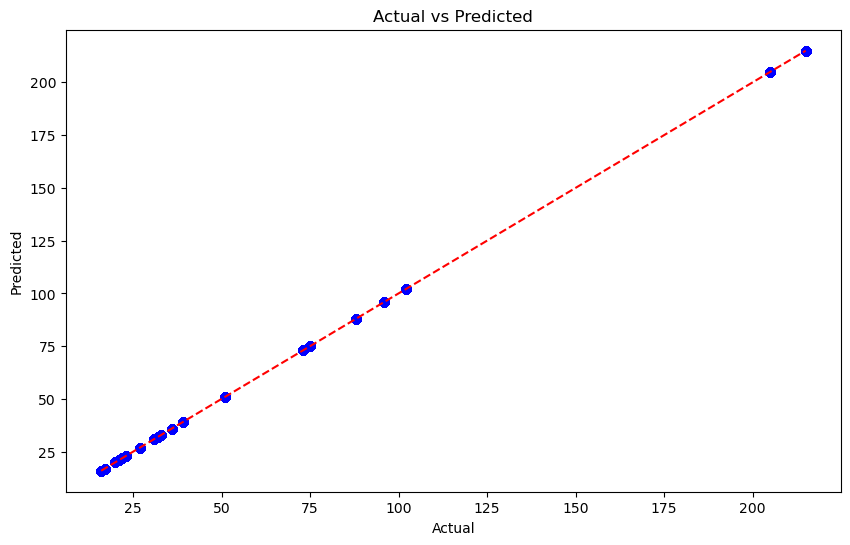

In [3]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_squared_log_error
import matplotlib.pyplot as plt

# Calculate MSE and RMSE
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"MSE: {mse}")
print(f"RMSE: {rmse}")

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()


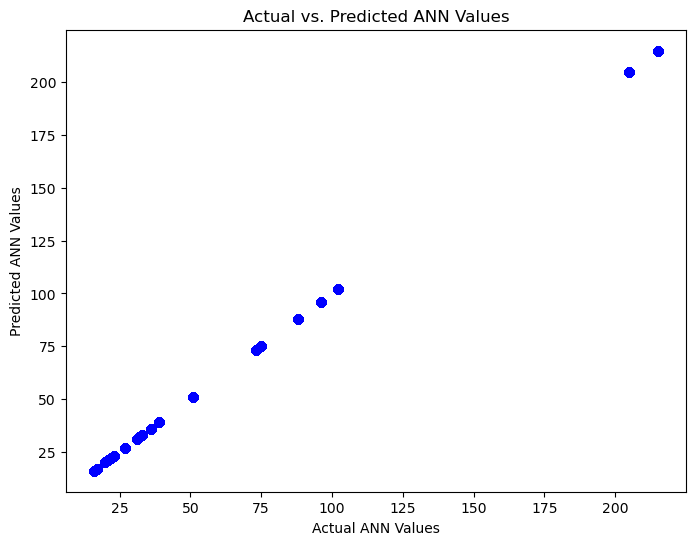

In [4]:
import matplotlib.pyplot as plt

# Step 1: Make predictions using the trained model
y_pred = rf_classifier.predict(X_test)

# Step 2: Plot the actual vs. predicted values using a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.title('Actual vs. Predicted ANN Values')
plt.xlabel('Actual ANN Values')
plt.ylabel('Predicted ANN Values')
plt.show()


In [34]:
import pandas as pd

# Load fire data and weather data
fire_data = pd.read_csv('classified_data2.csv')
weather_data = pd.read_csv('Precipitation2.csv')

landsurface_temp = pd.read_csv("LST2.csv")
temp = pd.read_csv("Earth SKIN Temp2.csv")
relative_humidity = pd.read_csv("Relative_Humidity2.csv")
specific_humidity = pd.read_csv("Specific_Humidity2.csv")
soilwetness_surface = pd.read_csv("SoilWetness_Surface2.csv")
soilwetness_rootzone = pd.read_csv("SoilWetness_Rootzone2.csv")
wind_direction = pd.read_csv("Wind_Direction2.csv")
wind_speed = pd.read_csv("Wind_Speed2.csv")
yearly_NDVI = pd.read_csv("Yearly_Thresholds_Mt_Kenya_Forest22.csv")

# Merge datasets based on common columns
merged_data = pd.merge(fire_data, weather_data, on=['YEAR'])

merged_data = pd.merge(merged_data, landsurface_temp, on=['YEAR'])
merged_data = pd.merge(merged_data, temp, on=['YEAR'])
merged_data = pd.merge(merged_data, relative_humidity, on=['YEAR']) 
merged_data = pd.merge(merged_data, specific_humidity, on=['YEAR']) 
#merged_data = pd.merge(merged_data, soilwetness_surface, on=['YEAR']) 
#merged_data = pd.merge(merged_data, soilwetness_rootzone, on=['YEAR']) 
#merged_data = pd.merge(merged_data, wind_direction, on=['YEAR']) 
#merged_data = pd.merge(merged_data, wind_speed, on=['YEAR']) 
merged_data = pd.merge(merged_data, yearly_NDVI, on=['YEAR'])

merged_data.head()




,latitude,longitude,acq_time,YEAR,ANN,LISA_cluster,Precipitation,LST,TS,RelaHum,Spechum,NDVI
0,0.2122,37.7333,801,2001,21,4,5.27,18.64,18.69,72.75,10.74,0.514756
1,0.2122,37.7333,801,2001,21,4,5.27,18.64,18.69,72.75,10.74,0.514756
2,0.2122,37.7333,801,2001,21,4,5.27,18.64,18.69,72.75,10.74,0.514756
3,0.2122,37.7333,801,2001,21,4,5.27,18.64,18.69,72.75,10.74,0.514756
4,0.2122,37.7333,801,2001,21,4,5.27,18.64,18.69,72.75,10.74,0.514756


In [1]:
#pip install tensorflow


In [16]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras import layers

# Load fire data and weather data
fire_data = pd.read_csv('classified_data2.csv')
weather_data = pd.read_csv('Precipitation2.csv')


#weather_data1 = pd.read_csv("RELATIVE HUMIDITY.csv")
#precipitation_data2 = pd.read_csv("Monthly_Precipitation_Mt_Kenya_Forest.csv")
landsurface_temp = pd.read_csv("LST2.csv")
temp = pd.read_csv("Earth SKIN Temp2.csv")
relative_humidity = pd.read_csv("Relative_Humidity2.csv")
specific_humidity = pd.read_csv("Specific_Humidity2.csv")
soilwetness_surface = pd.read_csv("SoilWetness_Surface2.csv")
soilwetness_rootzone = pd.read_csv("SoilWetness_Rootzone2.csv")
wind_direction = pd.read_csv("Wind_Direction2.csv")
wind_speed = pd.read_csv("Wind_Speed2.csv")
yearly_NDVI = pd.read_csv("Yearly_Thresholds_Mt_Kenya_Forest22.csv")
#monthly_NDVI = pd.read_csv("Monthly_NDVI_Mt_Kenya_Forest.csv")



# Merge datasets based on common columns

merged_data = pd.merge(fire_data, weather_data, on=['YEAR'])
merged_data = pd.merge(merged_data, landsurface_temp, on=['YEAR'])
merged_data = pd.merge(merged_data, temp, on=['YEAR'])
merged_data = pd.merge(merged_data, relative_humidity, on=['YEAR']) 
merged_data = pd.merge(merged_data, specific_humidity, on=['YEAR'])
merged_data = pd.merge(merged_data, yearly_NDVI, on=['YEAR'])
#merged_data = pd.merge(merged_data, soilwetness_surface, on=['YEAR']) 
#merged_data = pd.merge(merged_data, soilwetness_rootzone, on=['YEAR']) 
#merged_data = pd.merge(merged_data, wind_direction, on=['YEAR']) 
#merged_data = pd.merge(merged_data, wind_speed, on=['YEAR']) 


# Feature selection
features = ['Precipitation', 'LST', 'TS', 'RelaHum', 'Spechum', 'NDVI']  # Add relevant features
#features = ['Precipitation', 'Wetsurface','Wetroot','Wdirection', 'Wspeed']

X = merged_data[features]
y = merged_data['ANN']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the deep learning model
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=[X_train_scaled.shape[1]]),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Adjust output neurons based on your classification needs
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=10, validation_split=0.2)

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test_scaled, y_test)
print(f'Test Accuracy: {test_acc}')

# Make predictions for the years 2021-2027
# Assuming you have a new dataset for prediction called X_pred
X_pred_scaled = scaler.transform(X_pred)
predictions = model.predict(X_pred_scaled)

# View errors and other metrics (e.g., classification report, confusion matrix)
# Assuming you want to view classification report
from sklearn.metrics import classification_report
y_pred = (predictions > 0.5).astype(int)  # Threshold for binary classification
print(classification_report(y_test, y_pred))


C:\Users\DANIEL\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
203576/203576 ━━━━━━━━━━━━━━━━━━━━ 486s 2ms/step - accuracy: 0.0000e+00 - loss: -582236897280.0000 - val_accuracy: 0.0000e+00 - val_loss: -8656385998848.0000
Epoch 2/10
203576/203576 ━━━━━━━━━━━━━━━━━━━━ 507s 2ms/step - accuracy: 0.0000e+00 - loss: -18056092844032.0000 - val_accuracy: 0.0000e+00 - val_loss: -65331154386944.0000
Epoch 3/10
203576/203576 ━━━━━━━━━━━━━━━━━━━━ 498s 2ms/step - accuracy: 0.0000e+00 - loss: -94938842791936.0000 - val_accuracy: 0.0000e+00 - val_loss: -215642724630528.0000
Epoch 4/10
203576/203576 ━━━━━━━━━━━━━━━━━━━━ 476s 2ms/step - accuracy: 0.0000e+00 - loss: -276950463545344.0000 - val_accuracy: 0.0000e+00 - val_loss: -505017421266944.0000
Epoch 5/10
203576/203576 ━━━━━━━━━━━━━━━━━━━━ 418s 2ms/step - accuracy: 0.0000e+00 - loss: -609274598260736.0000 - val_accuracy: 0.0000e+00 - val_loss: -978891095146496.0000
Epoch 6/10
203576/203576 ━━━━━━━━━━━━━━━━━━━━ 445s 2ms/step - accuracy: 0.0000e+00 - loss: -1137187349331968.0000 - val_accuracy: 0.0000e+

NameError: name 'X_pred' is not defined

In [79]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras import layers

# Load fire data and weather data
fire_data = pd.read_csv('classified_data.csv')
weather_data = pd.read_csv('Precipitation.csv')

# Merge datasets based on common columns
merged_data = pd.merge(fire_data, weather_data, on=['YEAR'])

# Feature selection and preprocessing
features = ['latitude', 'longitude', 'brightness', 'scan', 'track', 'bright_t31', 'frp', 'month', 'day', 'ANN_y']  # Add relevant features
X = merged_data[features]
y = merged_data['ANN_x']  # Assuming this is your target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the deep learning model
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=[X_train_scaled.shape[1]]),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Adjust output neurons based on your classification needs
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=10, validation_split=0.2)

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test_scaled, y_test)
print(f'Test Accuracy: {test_acc}')

# Make predictions for the years 2021-2027
# Create a new dataset for prediction (X_pred) based on your requirements
# For example, assume X_pred contains the same features as X but for the years 2021-2027
# Here's a hypothetical example:
X_pred = pd.DataFrame({
    'latitude': [10.0, 20.0, 30.0, 40.0, 50.0, 60.0],
    'longitude': [100.0, 200.0, 300.0, 400.0, 500.0, 600.0],
    'brightness': [300.0, 400.0, 500.0, 600.0, 700.0, 800.0],
    'scan': [1.2, 1.3, 1.4, 1.5, 1.6, 1.7],
    'track': [1.5, 1.6, 1.7, 1.8, 1.9, 2.0],
    'bright_t31': [305.0, 310.0, 315.0, 320.0, 325.0, 330.0],
    'frp': [20.0, 30.0, 40.0, 50.0, 60.0, 70.0],
    'month': [1, 2, 3, 4, 5, 6],
    'day': [15, 16, 17, 18, 19, 20],
    'ANN_y': [2021, 2022, 2023, 2024, 2025, 2026]
})

# Scale the new data using the same scaler used for training data
X_pred_scaled = scaler.transform(X_pred)

# Make predictions
predictions = model.predict(X_pred_scaled)
print(predictions)


Epoch 1/10


C:\Users\DANIEL\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


158/158 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.0000e+00 - loss: -1782.6608 - val_accuracy: 0.0000e+00 - val_loss: -24389.7988
Epoch 2/10
158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: -60236.4766 - val_accuracy: 0.0000e+00 - val_loss: -231004.3281
Epoch 3/10
158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: -374559.2500 - val_accuracy: 0.0000e+00 - val_loss: -844124.1250
Epoch 4/10
158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: -1182261.3750 - val_accuracy: 0.0000e+00 - val_loss: -2040846.0000
Epoch 5/10
158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: -2567282.2500 - val_accuracy: 0.0000e+00 - val_loss: -3972226.7500
Epoch 6/10
158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: -4876480.0000 - val_accuracy: 0.0000e+00 - val_loss: -6773463.5000
Epoch 7/10
158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: -8077669.5000 - val_accuracy: 0.0000e+

In [80]:
# Make predictions
predictions = model.predict(X_pred_scaled)
print(predictions)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
[[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]]


In [82]:
# Assume X and y are already prepared
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define a deeper neural network model
model = keras.Sequential([
    layers.Dense(256, activation='relu', input_shape=[X_train_scaled.shape[1]]),
    layers.Dropout(0.2),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model with adjusted learning rate and optimizer
optimizer = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Train the model with more epochs
history = model.fit(X_train_scaled, y_train, epochs=70, validation_split=0.3)

# Evaluate the model again
test_loss, test_acc = model.evaluate(X_test_scaled, y_test)
print(f'Test Accuracy: {test_acc}')

# Make predictions and analyze errors as mentioned earlier


Epoch 1/70


C:\Users\DANIEL\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


138/138 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.0000e+00 - loss: -2859.7178 - val_accuracy: 0.0000e+00 - val_loss: -44953.1211
Epoch 2/70
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0000e+00 - loss: -113063.9766 - val_accuracy: 0.0000e+00 - val_loss: -463827.5312
Epoch 3/70
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: -735180.5000 - val_accuracy: 0.0000e+00 - val_loss: -1763606.8750
Epoch 4/70
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: -2372030.0000 - val_accuracy: 0.0000e+00 - val_loss: -4432312.5000
Epoch 5/70
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: -5469276.0000 - val_accuracy: 0.0000e+00 - val_loss: -8937583.0000
Epoch 6/70
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: -10547680.0000 - val_accuracy: 0.0000e+00 - val_loss: -15596010.0000
Epoch 7/70
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: -18315684.0000 - val_accuracy: 0.0

In [ ]:
#Linear regression

In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Load fire data and weather data
fire_data = pd.read_csv('classified_data2.csv')
weather_data = pd.read_csv('Precipitation2.csv')


#weather_data1 = pd.read_csv("RELATIVE HUMIDITY.csv")
#precipitation_data2 = pd.read_csv("Monthly_Precipitation_Mt_Kenya_Forest.csv")
landsurface_temp = pd.read_csv("LST2.csv")
temp = pd.read_csv("Earth SKIN Temp2.csv")
relative_humidity = pd.read_csv("Relative_Humidity2.csv")
specific_humidity = pd.read_csv("Specific_Humidity2.csv")
soilwetness_surface = pd.read_csv("SoilWetness_Surface2.csv")
soilwetness_rootzone = pd.read_csv("SoilWetness_Rootzone2.csv")
wind_direction = pd.read_csv("Wind_Direction2.csv")
wind_speed = pd.read_csv("Wind_Speed2.csv")
yearly_NDVI = pd.read_csv("Yearly_Thresholds_Mt_Kenya_Forest22.csv")
#monthly_NDVI = pd.read_csv("Monthly_NDVI_Mt_Kenya_Forest.csv")



# Merge datasets based on common columns

merged_data = pd.merge(fire_data, weather_data, on=['YEAR'])
merged_data = pd.merge(merged_data, landsurface_temp, on=['YEAR'])
merged_data = pd.merge(merged_data, temp, on=['YEAR'])
merged_data = pd.merge(merged_data, relative_humidity, on=['YEAR']) 
merged_data = pd.merge(merged_data, specific_humidity, on=['YEAR'])
merged_data = pd.merge(merged_data, yearly_NDVI, on=['YEAR'])
#merged_data = pd.merge(merged_data, soilwetness_surface, on=['YEAR']) 
#merged_data = pd.merge(merged_data, soilwetness_rootzone, on=['YEAR']) 
#merged_data = pd.merge(merged_data, wind_direction, on=['YEAR']) 
#merged_data = pd.merge(merged_data, wind_speed, on=['YEAR']) 


# Feature selection
features = ['Precipitation', 'LST', 'TS', 'RelaHum', 'Spechum', 'NDVI']  # Add relevant features
#features = ['Precipitation', 'Wetsurface','Wetroot','Wdirection', 'Wspeed']

X = merged_data[features]
y = merged_data['ANN']
# Initialize the Linear Regression model
linear_reg = LinearRegression()

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
linear_reg.fit(X_train, y_train)

# Make predictions
y_pred_linear = linear_reg.predict(X_test)

# Calculate and print the Mean Squared Error (MSE)
mse_linear = mean_squared_error(y_test, y_pred_linear)
print("Mean Squared Error (MSE) for Linear Regression:", mse_linear)

Mean Squared Error (MSE) for Linear Regression: 1956.975746702866


In [3]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Assuming 'test' is your actual values and 'forecast' is your model's predictions
mse = mean_squared_error(y_test, y_pred_linear)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred_linear)

# Adjusting errors considering the y-axis scale factor
scale_factor = 0.2 * 1e6
adjusted_mse = mse / (scale_factor ** 2)
adjusted_rmse = rmse / scale_factor
adjusted_mae = mae / scale_factor

# Printing adjusted accuracies
print(f"Adjusted Mean Squared Error (MSE): {adjusted_mse}")
print(f"Adjusted Root Mean Squared Error (RMSE): {adjusted_rmse}")
print(f"Adjusted Mean Absolute Error (MAE): {adjusted_mae}")

Adjusted Mean Squared Error (MSE): 4.892439366757165e-08
Adjusted Root Mean Squared Error (RMSE): 0.00022118859298700657
Adjusted Mean Absolute Error (MAE): 0.0001784747364773553


In [ ]:
#Decision Trees

In [6]:
from sklearn.tree import DecisionTreeRegressor
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Load fire data and weather data
fire_data = pd.read_csv('classified_data2.csv')
weather_data = pd.read_csv('Precipitation2.csv')


#weather_data1 = pd.read_csv("RELATIVE HUMIDITY.csv")
#precipitation_data2 = pd.read_csv("Monthly_Precipitation_Mt_Kenya_Forest.csv")
landsurface_temp = pd.read_csv("LST2.csv")
temp = pd.read_csv("Earth SKIN Temp2.csv")
relative_humidity = pd.read_csv("Relative_Humidity2.csv")
specific_humidity = pd.read_csv("Specific_Humidity2.csv")
soilwetness_surface = pd.read_csv("SoilWetness_Surface2.csv")
soilwetness_rootzone = pd.read_csv("SoilWetness_Rootzone2.csv")
wind_direction = pd.read_csv("Wind_Direction2.csv")
wind_speed = pd.read_csv("Wind_Speed2.csv")
yearly_NDVI = pd.read_csv("Yearly_Thresholds_Mt_Kenya_Forest22.csv")
#monthly_NDVI = pd.read_csv("Monthly_NDVI_Mt_Kenya_Forest.csv")



# Merge datasets based on common columns

merged_data = pd.merge(fire_data, weather_data, on=['YEAR'])
merged_data = pd.merge(merged_data, landsurface_temp, on=['YEAR'])
merged_data = pd.merge(merged_data, temp, on=['YEAR'])
merged_data = pd.merge(merged_data, relative_humidity, on=['YEAR']) 
merged_data = pd.merge(merged_data, specific_humidity, on=['YEAR'])
merged_data = pd.merge(merged_data, yearly_NDVI, on=['YEAR'])
#merged_data = pd.merge(merged_data, soilwetness_surface, on=['YEAR']) 
#merged_data = pd.merge(merged_data, soilwetness_rootzone, on=['YEAR']) 
#merged_data = pd.merge(merged_data, wind_direction, on=['YEAR']) 
#merged_data = pd.merge(merged_data, wind_speed, on=['YEAR']) 


# Feature selection
features = ['Precipitation', 'LST', 'TS', 'RelaHum', 'Spechum', 'NDVI']  # Add relevant features
#features = ['Precipitation', 'Wetsurface','Wetroot','Wdirection', 'Wspeed']

X = merged_data[features]
y = merged_data['ANN']
# Initialize the Decision Tree Regressor model
decision_tree = DecisionTreeRegressor(random_state=42)

# Train the model
decision_tree.fit(X_train, y_train)

# Make predictions
y_pred_dt = decision_tree.predict(X_test)

# Calculate and print the Mean Squared Error (MSE)
mse_dt = mean_squared_error(y_test, y_pred_dt)
print("Mean Squared Error (MSE) for Decision Tree Regressor:", mse_dt)


Mean Squared Error (MSE) for Decision Tree Regressor: 0.0


In [7]:
#RANDOM FOREST

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Load fire data and weather data
fire_data = pd.read_csv('classified_data2.csv')
weather_data = pd.read_csv('Precipitation2.csv')


#weather_data1 = pd.read_csv("RELATIVE HUMIDITY.csv")
#precipitation_data2 = pd.read_csv("Monthly_Precipitation_Mt_Kenya_Forest.csv")
landsurface_temp = pd.read_csv("LST2.csv")
temp = pd.read_csv("Earth SKIN Temp2.csv")
relative_humidity = pd.read_csv("Relative_Humidity2.csv")
specific_humidity = pd.read_csv("Specific_Humidity2.csv")
soilwetness_surface = pd.read_csv("SoilWetness_Surface2.csv")
soilwetness_rootzone = pd.read_csv("SoilWetness_Rootzone2.csv")
wind_direction = pd.read_csv("Wind_Direction2.csv")
wind_speed = pd.read_csv("Wind_Speed2.csv")
yearly_NDVI = pd.read_csv("Yearly_Thresholds_Mt_Kenya_Forest22.csv")
#monthly_NDVI = pd.read_csv("Monthly_NDVI_Mt_Kenya_Forest.csv")



# Merge datasets based on common columns

merged_data = pd.merge(fire_data, weather_data, on=['YEAR'])
merged_data = pd.merge(merged_data, landsurface_temp, on=['YEAR'])
merged_data = pd.merge(merged_data, temp, on=['YEAR'])
merged_data = pd.merge(merged_data, relative_humidity, on=['YEAR']) 
merged_data = pd.merge(merged_data, specific_humidity, on=['YEAR'])
merged_data = pd.merge(merged_data, yearly_NDVI, on=['YEAR'])
#merged_data = pd.merge(merged_data, soilwetness_surface, on=['YEAR']) 
#merged_data = pd.merge(merged_data, soilwetness_rootzone, on=['YEAR']) 
#merged_data = pd.merge(merged_data, wind_direction, on=['YEAR']) 
#merged_data = pd.merge(merged_data, wind_speed, on=['YEAR']) 


# Feature selection
features = ['Precipitation', 'LST', 'TS', 'RelaHum', 'Spechum', 'NDVI']  # Add relevant features
#features = ['Precipitation', 'Wetsurface','Wetroot','Wdirection', 'Wspeed']

X = merged_data[features]
y = merged_data['ANN']

from sklearn.ensemble import RandomForestRegressor

# Initialize the Random Forest Regressor model
random_forest = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
random_forest.fit(X_train, y_train)

# Make predictions
y_pred_rf = random_forest.predict(X_test)

# Calculate and print the Mean Squared Error (MSE)
mse_rf = mean_squared_error(y_test, y_pred_rf)
print("Mean Squared Error (MSE) for Random Forest Regressor:", mse_rf)


Mean Squared Error (MSE) for Random Forest Regressor: 0.0


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Load fire data and weather data
fire_data = pd.read_csv('classified_data2.csv')
weather_data = pd.read_csv('Precipitation2.csv')


#weather_data1 = pd.read_csv("RELATIVE HUMIDITY.csv")
#precipitation_data2 = pd.read_csv("Monthly_Precipitation_Mt_Kenya_Forest.csv")
landsurface_temp = pd.read_csv("LST2.csv")
temp = pd.read_csv("Earth SKIN Temp2.csv")
relative_humidity = pd.read_csv("Relative_Humidity2.csv")
specific_humidity = pd.read_csv("Specific_Humidity2.csv")
soilwetness_surface = pd.read_csv("SoilWetness_Surface2.csv")
soilwetness_rootzone = pd.read_csv("SoilWetness_Rootzone2.csv")
wind_direction = pd.read_csv("Wind_Direction2.csv")
wind_speed = pd.read_csv("Wind_Speed2.csv")
yearly_NDVI = pd.read_csv("Yearly_Thresholds_Mt_Kenya_Forest22.csv")
#monthly_NDVI = pd.read_csv("Monthly_NDVI_Mt_Kenya_Forest.csv")



# Merge datasets based on common columns

merged_data = pd.merge(fire_data, weather_data, on=['YEAR'])
merged_data = pd.merge(merged_data, landsurface_temp, on=['YEAR'])
merged_data = pd.merge(merged_data, temp, on=['YEAR'])
merged_data = pd.merge(merged_data, relative_humidity, on=['YEAR']) 
merged_data = pd.merge(merged_data, specific_humidity, on=['YEAR'])
merged_data = pd.merge(merged_data, yearly_NDVI, on=['YEAR'])
#merged_data = pd.merge(merged_data, soilwetness_surface, on=['YEAR']) 
#merged_data = pd.merge(merged_data, soilwetness_rootzone, on=['YEAR']) 
#merged_data = pd.merge(merged_data, wind_direction, on=['YEAR']) 
#merged_data = pd.merge(merged_data, wind_speed, on=['YEAR']) 


# Feature selection
features = ['Precipitation', 'LST', 'TS', 'RelaHum', 'Spechum', 'NDVI']  # Add relevant features
#features = ['Precipitation', 'Wetsurface','Wetroot','Wdirection', 'Wspeed']

X = merged_data[features]
y = merged_data['ANN']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Example: Try different models or adjust hyperparameters
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Define a Random Forest Regressor
rf_model = RandomForestRegressor()

# Define hyperparameters grid for tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20]
}

# Perform grid search for hyperparameter tuning
grid_search = GridSearchCV(rf_model, param_grid, cv=5)
grid_search.fit(X_train, y_train)
best_rf_model = grid_search.best_estimator_


In [ ]:
from sklearn.preprocessing import StandardScaler

# Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
from sklearn.metrics import mean_squared_error

# Example: Evaluate model performance
y_pred = best_rf_model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error (RMSE) :", rmse)




In [9]:
#Gradient Boosting

In [2]:
from sklearn.ensemble import GradientBoostingRegressor

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Load fire data and weather data
fire_data = pd.read_csv('classified_data2.csv')
weather_data = pd.read_csv('Precipitation2.csv')


#weather_data1 = pd.read_csv("RELATIVE HUMIDITY.csv")
#precipitation_data2 = pd.read_csv("Monthly_Precipitation_Mt_Kenya_Forest.csv")
landsurface_temp = pd.read_csv("LST2.csv")
temp = pd.read_csv("Earth SKIN Temp2.csv")
relative_humidity = pd.read_csv("Relative_Humidity2.csv")
specific_humidity = pd.read_csv("Specific_Humidity2.csv")
soilwetness_surface = pd.read_csv("SoilWetness_Surface2.csv")
soilwetness_rootzone = pd.read_csv("SoilWetness_Rootzone2.csv")
wind_direction = pd.read_csv("Wind_Direction2.csv")
wind_speed = pd.read_csv("Wind_Speed2.csv")
yearly_NDVI = pd.read_csv("Yearly_Thresholds_Mt_Kenya_Forest22.csv")
#monthly_NDVI = pd.read_csv("Monthly_NDVI_Mt_Kenya_Forest.csv")



# Merge datasets based on common columns

merged_data = pd.merge(fire_data, weather_data, on=['YEAR'])
merged_data = pd.merge(merged_data, landsurface_temp, on=['YEAR'])
merged_data = pd.merge(merged_data, temp, on=['YEAR'])
merged_data = pd.merge(merged_data, relative_humidity, on=['YEAR']) 
merged_data = pd.merge(merged_data, specific_humidity, on=['YEAR'])
merged_data = pd.merge(merged_data, yearly_NDVI, on=['YEAR'])
#merged_data = pd.merge(merged_data, soilwetness_surface, on=['YEAR']) 
#merged_data = pd.merge(merged_data, soilwetness_rootzone, on=['YEAR']) 
#merged_data = pd.merge(merged_data, wind_direction, on=['YEAR']) 
#merged_data = pd.merge(merged_data, wind_speed, on=['YEAR']) 


# Feature selection
features = ['latitude','longitude','Precipitation', 'LST', 'TS', 'RelaHum', 'Spechum', 'NDVI']  # Add relevant features
#features = ['Precipitation', 'Wetsurface','Wetroot','Wdirection', 'Wspeed']

X = merged_data[features]
y = merged_data['ANN']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Gradient Boosting Regressor model
gradient_boosting = GradientBoostingRegressor(n_estimators=100, random_state=42)

# Train the model
gradient_boosting.fit(X_train, y_train)

# Make predictions
y_pred_gb = gradient_boosting.predict(X_test)

# Calculate and print the Mean Squared Error (MSE)
mse_gb = mean_squared_error(y_test, y_pred_gb)
rmse_gb = np.sqrt(mse_gb)

print("Mean Squared Error (MSE) for Gradient Boosting Regressor:", mse_gb)
print("Root Mean Squared Error (RMSE) for Gradient Boosting Regressor :", rmse_gb)

NameError: name 'mean_squared_error' is not defined

In [3]:
from sklearn.metrics import mean_squared_error
# Calculate and print the Mean Squared Error (MSE)
mse_gb = mean_squared_error(y_test, y_pred_gb)
rmse_gb = np.sqrt(mse_gb)

print("Mean Squared Error (MSE) for Gradient Boosting Regressor:", mse_gb)
print("Root Mean Squared Error (RMSE) for Gradient Boosting Regressor :", rmse_gb)

Mean Squared Error (MSE) for Gradient Boosting Regressor: 0.13455456604617255
Root Mean Squared Error (RMSE) for Gradient Boosting Regressor : 0.3668168017501005


In [4]:
from sklearn.ensemble import GradientBoostingRegressor
import joblib

# Save the model to a file
joblib.dump(gradient_boosting, 'gb_regressor_model.pkl')

# Load the model from the file
loaded_gb_model = joblib.load('gb_regressor_model.pkl')


In [32]:
# Assume new_data is a dictionary or DataFrame containing the features for prediction
new_data = {
    'latitude': 0.28,
    'longitude': 37.3,
    'Precipitation': 8.0,
    'LST': 20.0,
    'TS': 21.0,
    'RelaHum': 70.0,
    'Spechum': 12.0,
    'NDVI': 0.55
}

# Convert new_data to DataFrame or 2D array
input_df = pd.DataFrame([new_data])

# Ensure that the features in input_df are in the same order and format as X_train
# Normalize/Scale the new data (if needed) using the same scaler used for X_train

# Make predictions using the trained model
predicted_ann = gradient_boosting.predict(input_df)

# You can use the predicted_ann directly for point predictions, or compute confidence intervals, etc.
print("Predicted ANN Value:", predicted_ann)


Predicted ANN Value: [56.71491935]


In [41]:
from sklearn.ensemble import GradientBoostingRegressor
import numpy as np
import pandas as pd

# Assuming merged_data contains your historical data
# Extract 'YEAR' and 'ANN' features for training
X_train_year = merged_data[['YEAR']].values  # Extract 'YEAR' as feature for training
y_train_ann = merged_data['ANN'].values  # Target variable (ANN values)

# Initialize the Gradient Boosting Regressor model
gradient_boosting = GradientBoostingRegressor(n_estimators=100, random_state=42)

# Train the model
gradient_boosting.fit(X_train_year, y_train_ann)

# Generate future timestamps for the next five years starting from 2020
future_years = np.arange(2020, 2020 + 10).reshape(-1, 1)  # Next five years starting from 2020

# Predict ANN values for the next five years using the trained model
predicted_ann_future_gb = gradient_boosting.predict(future_years)

print("Predicted ANN Values for the Next Five Years (Gradient Boosting Regressor):")
for year, ann_value in zip(future_years.flatten(), predicted_ann_future_gb):
    print(f"Year {year}: Predicted ANN = {ann_value:.2f}")


Predicted ANN Values for the Next Five Years (Gradient Boosting Regressor):
Year 2020: Predicted ANN = 20.65
Year 2021: Predicted ANN = 22.61
Year 2022: Predicted ANN = 88.35
Year 2023: Predicted ANN = 88.35
Year 2024: Predicted ANN = 88.35
Year 2025: Predicted ANN = 88.35
Year 2026: Predicted ANN = 88.35
Year 2027: Predicted ANN = 88.35
Year 2028: Predicted ANN = 88.35
Year 2029: Predicted ANN = 88.35


In [42]:
# Predict ANN values for the next five years using the trained model
predicted_ann_future_gb = gradient_boosting.predict(future_years)

# Round the predicted fire occurrences to the nearest integer
predicted_ann_future_gb_rounded = np.round(predicted_ann_future_gb).astype(int)

print("Predicted Fire Occurrences for the Next Five Years (Gradient Boosting Regressor):")
for year, fire_occurrence in zip(future_years.flatten(), predicted_ann_future_gb_rounded):
    print(f"Year {year}: Predicted Fire Occurrence = {fire_occurrence}")


Predicted Fire Occurrences for the Next Five Years (Gradient Boosting Regressor):
Year 2020: Predicted Fire Occurrence = 21
Year 2021: Predicted Fire Occurrence = 23
Year 2022: Predicted Fire Occurrence = 88
Year 2023: Predicted Fire Occurrence = 88
Year 2024: Predicted Fire Occurrence = 88
Year 2025: Predicted Fire Occurrence = 88
Year 2026: Predicted Fire Occurrence = 88
Year 2027: Predicted Fire Occurrence = 88
Year 2028: Predicted Fire Occurrence = 88
Year 2029: Predicted Fire Occurrence = 88


In [1]:
#Support Vector Regressor

In [ ]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Load fire data and weather data
fire_data = pd.read_csv('classified_data2.csv')
weather_data = pd.read_csv('Precipitation2.csv')


#weather_data1 = pd.read_csv("RELATIVE HUMIDITY.csv")
#precipitation_data2 = pd.read_csv("Monthly_Precipitation_Mt_Kenya_Forest.csv")
landsurface_temp = pd.read_csv("LST2.csv")
temp = pd.read_csv("Earth SKIN Temp2.csv")
relative_humidity = pd.read_csv("Relative_Humidity2.csv")
specific_humidity = pd.read_csv("Specific_Humidity2.csv")
soilwetness_surface = pd.read_csv("SoilWetness_Surface2.csv")
soilwetness_rootzone = pd.read_csv("SoilWetness_Rootzone2.csv")
wind_direction = pd.read_csv("Wind_Direction2.csv")
wind_speed = pd.read_csv("Wind_Speed2.csv")
yearly_NDVI = pd.read_csv("Yearly_Thresholds_Mt_Kenya_Forest22.csv")
#monthly_NDVI = pd.read_csv("Monthly_NDVI_Mt_Kenya_Forest.csv")



# Merge datasets based on common columns

merged_data = pd.merge(fire_data, weather_data, on=['YEAR'])
merged_data = pd.merge(merged_data, landsurface_temp, on=['YEAR'])
merged_data = pd.merge(merged_data, temp, on=['YEAR'])
merged_data = pd.merge(merged_data, relative_humidity, on=['YEAR']) 
merged_data = pd.merge(merged_data, specific_humidity, on=['YEAR'])
merged_data = pd.merge(merged_data, yearly_NDVI, on=['YEAR'])
#merged_data = pd.merge(merged_data, soilwetness_surface, on=['YEAR']) 
#merged_data = pd.merge(merged_data, soilwetness_rootzone, on=['YEAR']) 
#merged_data = pd.merge(merged_data, wind_direction, on=['YEAR']) 
#merged_data = pd.merge(merged_data, wind_speed, on=['YEAR']) 


# Feature selection
features = ['Precipitation', 'LST', 'TS', 'RelaHum', 'Spechum', 'NDVI']  # Add relevant features
#features = ['Precipitation', 'Wetsurface','Wetroot','Wdirection', 'Wspeed']

X = merged_data[features]
y = merged_data['ANN']

# Assuming X and y are already defined
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the SVR model with a pipeline for scaling
svr = make_pipeline(StandardScaler(), SVR())

# Train the model
svr.fit(X_train, y_train)

# Make predictions
y_pred_svr = svr.predict(X_test)

# Calculate and print the Mean Squared Error (MSE)
mse_svr = mean_squared_error(y_test, y_pred_svr)
print("Mean Squared Error (MSE) for SVR:", mse_svr)


In [11]:
#Recurrent Neural Network

In [1]:
import numpy as np
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense
from sklearn.metrics import mean_squared_error

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Load fire data and weather data
fire_data = pd.read_csv('classified_data2.csv')
weather_data = pd.read_csv('Precipitation2.csv')


#weather_data1 = pd.read_csv("RELATIVE HUMIDITY.csv")
#precipitation_data2 = pd.read_csv("Monthly_Precipitation_Mt_Kenya_Forest.csv")
landsurface_temp = pd.read_csv("LST2.csv")
temp = pd.read_csv("Earth SKIN Temp2.csv")
relative_humidity = pd.read_csv("Relative_Humidity2.csv")
specific_humidity = pd.read_csv("Specific_Humidity2.csv")
soilwetness_surface = pd.read_csv("SoilWetness_Surface2.csv")
soilwetness_rootzone = pd.read_csv("SoilWetness_Rootzone2.csv")
wind_direction = pd.read_csv("Wind_Direction2.csv")
wind_speed = pd.read_csv("Wind_Speed2.csv")
yearly_NDVI = pd.read_csv("Yearly_Thresholds_Mt_Kenya_Forest22.csv")
#monthly_NDVI = pd.read_csv("Monthly_NDVI_Mt_Kenya_Forest.csv")



# Merge datasets based on common columns

merged_data = pd.merge(fire_data, weather_data, on=['YEAR'])
merged_data = pd.merge(merged_data, landsurface_temp, on=['YEAR'])
merged_data = pd.merge(merged_data, temp, on=['YEAR'])
merged_data = pd.merge(merged_data, relative_humidity, on=['YEAR']) 
merged_data = pd.merge(merged_data, specific_humidity, on=['YEAR'])
merged_data = pd.merge(merged_data, yearly_NDVI, on=['YEAR'])
#merged_data = pd.merge(merged_data, soilwetness_surface, on=['YEAR']) 
#merged_data = pd.merge(merged_data, soilwetness_rootzone, on=['YEAR']) 
#merged_data = pd.merge(merged_data, wind_direction, on=['YEAR']) 
#merged_data = pd.merge(merged_data, wind_speed, on=['YEAR']) 


# Feature selection
features = ['Precipitation', 'LST', 'TS', 'RelaHum', 'Spechum', 'NDVI']  # Add relevant features
#features = ['Precipitation', 'Wetsurface','Wetroot','Wdirection', 'Wspeed']

X = merged_data[features]
y = merged_data['ANN']

# Assuming X and y are already defined
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert pandas DataFrames to numpy arrays
X_train_np = np.array(X_train)
X_test_np = np.array(X_test)
y_train_np = np.array(y_train)
y_test_np = np.array(y_test)

# Reshape the input data for RNN
X_train_rnn = X_train_np.reshape((X_train_np.shape[0], X_train_np.shape[1], 1))
X_test_rnn = X_test_np.reshape((X_test_np.shape[0], X_test_np.shape[1], 1))

# Initialize the RNN model
rnn_model = Sequential()
rnn_model.add(SimpleRNN(units=50, activation='relu', input_shape=(X_train_rnn.shape[1], 1)))
rnn_model.add(Dense(units=1))

# Compile the model
rnn_model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
rnn_model.fit(X_train_rnn, y_train_np, epochs=10, batch_size=32, verbose=1)

# Make predictions
y_pred_rnn = rnn_model.predict(X_test_rnn)

# Calculate and print the Mean Squared Error (MSE)
mse_rnn = mean_squared_error(y_test_np, y_pred_rnn)
print("Mean Squared Error (MSE) for RNN:", mse_rnn)


C:\Users\DANIEL\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
254470/254470 ━━━━━━━━━━━━━━━━━━━━ 1022s 4ms/step - loss: 370.6928
Epoch 2/10
254470/254470 ━━━━━━━━━━━━━━━━━━━━ 751s 3ms/step - loss: 6.3876
Epoch 3/10
254470/254470 ━━━━━━━━━━━━━━━━━━━━ 700s 3ms/step - loss: 5.2548
Epoch 4/10
254470/254470 ━━━━━━━━━━━━━━━━━━━━ 712s 3ms/step - loss: 2.8265
Epoch 5/10
254470/254470 ━━━━━━━━━━━━━━━━━━━━ 727s 3ms/step - loss: 1.8731
Epoch 6/10
254470/254470 ━━━━━━━━━━━━━━━━━━━━ 886s 3ms/step - loss: 3.7768
Epoch 7/10
254470/254470 ━━━━━━━━━━━━━━━━━━━━ 654s 3ms/step - loss: 1.8437
Epoch 8/10
254470/254470 ━━━━━━━━━━━━━━━━━━━━ 642s 3ms/step - loss: 1.6855
Epoch 9/10
254470/254470 ━━━━━━━━━━━━━━━━━━━━ 628s 2ms/step - loss: 1.9433
Epoch 10/10
254470/254470 ━━━━━━━━━━━━━━━━━━━━ 673s 3ms/step - loss: 1.4791
63618/63618 ━━━━━━━━━━━━━━━━━━━━ 134s 2ms/step
Mean Squared Error (MSE) for RNN: 2.6700375850899306e-09


In [2]:
#Long Short-Term Memory Network

In [3]:
from keras.layers import LSTM
from keras.models import Sequential
from keras.layers import LSTM, Dense

import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Load fire data and weather data
fire_data = pd.read_csv('classified_data2.csv')
weather_data = pd.read_csv('Precipitation2.csv')


#weather_data1 = pd.read_csv("RELATIVE HUMIDITY.csv")
#precipitation_data2 = pd.read_csv("Monthly_Precipitation_Mt_Kenya_Forest.csv")
landsurface_temp = pd.read_csv("LST2.csv")
temp = pd.read_csv("Earth SKIN Temp2.csv")
relative_humidity = pd.read_csv("Relative_Humidity2.csv")
specific_humidity = pd.read_csv("Specific_Humidity2.csv")
soilwetness_surface = pd.read_csv("SoilWetness_Surface2.csv")
soilwetness_rootzone = pd.read_csv("SoilWetness_Rootzone2.csv")
wind_direction = pd.read_csv("Wind_Direction2.csv")
wind_speed = pd.read_csv("Wind_Speed2.csv")
yearly_NDVI = pd.read_csv("Yearly_Thresholds_Mt_Kenya_Forest22.csv")
#monthly_NDVI = pd.read_csv("Monthly_NDVI_Mt_Kenya_Forest.csv")



# Merge datasets based on common columns

merged_data = pd.merge(fire_data, weather_data, on=['YEAR'])
merged_data = pd.merge(merged_data, landsurface_temp, on=['YEAR'])
merged_data = pd.merge(merged_data, temp, on=['YEAR'])
merged_data = pd.merge(merged_data, relative_humidity, on=['YEAR']) 
merged_data = pd.merge(merged_data, specific_humidity, on=['YEAR'])
merged_data = pd.merge(merged_data, yearly_NDVI, on=['YEAR'])
#merged_data = pd.merge(merged_data, soilwetness_surface, on=['YEAR']) 
#merged_data = pd.merge(merged_data, soilwetness_rootzone, on=['YEAR']) 
#merged_data = pd.merge(merged_data, wind_direction, on=['YEAR']) 
#merged_data = pd.merge(merged_data, wind_speed, on=['YEAR']) 


# Feature selection
features = ['Precipitation', 'LST', 'TS', 'RelaHum', 'Spechum', 'NDVI']  # Add relevant features
#features = ['Precipitation', 'Wetsurface','Wetroot','Wdirection', 'Wspeed']

X = merged_data[features]
y = merged_data['ANN']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape the data for LSTM (assuming 2D input)
X_train_rnn = np.reshape(X_train_scaled, (X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
X_test_rnn = np.reshape(X_test_scaled, (X_test_scaled.shape[0], X_test_scaled.shape[1], 1))

# Initialize the LSTM model
lstm_model = Sequential()
lstm_model.add(LSTM(units=50, activation='relu', input_shape=(X_train_rnn.shape[1], 1)))
lstm_model.add(Dense(units=1))

# Compile the model
lstm_model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
lstm_model.fit(X_train_rnn, y_train, epochs=5, batch_size=32, verbose=1)

# Make predictions
y_pred_lstm = lstm_model.predict(X_test_rnn)

# Calculate and print the Mean Squared Error (MSE)
mse_lstm = mean_squared_error(y_test_np, y_pred_lstm)
rmse_lstm = np.sqrt(mse_lstm)
print("Mean Squared Error (MSE) for LSTM:", mse_lstm)
print("Root Mean Squared Error (RMSE) for LSTM:", rmse_lstm)



C:\Users\DANIEL\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
254470/254470 ━━━━━━━━━━━━━━━━━━━━ 2641s 10ms/step - loss: 94.6398
Epoch 2/5
254470/254470 ━━━━━━━━━━━━━━━━━━━━ 2614s 10ms/step - loss: 0.0723
Epoch 3/5
254470/254470 ━━━━━━━━━━━━━━━━━━━━ 2079s 8ms/step - loss: 0.0386
Epoch 4/5
254470/254470 ━━━━━━━━━━━━━━━━━━━━ 2141s 8ms/step - loss: 0.0143
53604/63618 ━━━━━━━━━━━━━━━━━━━━ 51s 5ms/step

NameError: name 'y_test_np' is not defined

In [4]:
# Calculate and print the Mean Squared Error (MSE)
mse_lstm = mean_squared_error(y_test, y_pred_lstm)
rmse_lstm = np.sqrt(mse_lstm)
print("Mean Squared Error (MSE) for LSTM:", mse_lstm)
print("Root Mean Squared Error (RMSE) for LSTM:", rmse_lstm)


Mean Squared Error (MSE) for LSTM: 1.9781896116270027e-05
Root Mean Squared Error (RMSE) for LSTM: 0.00444768435438825


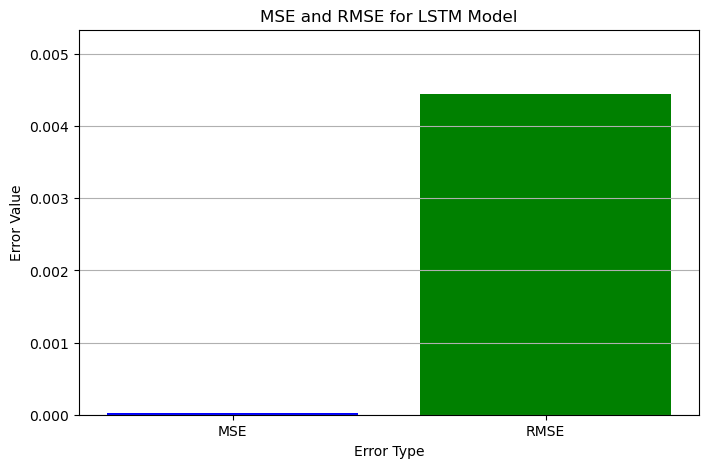

In [5]:
import matplotlib.pyplot as plt

# Actual MSE and RMSE values
mse_lstm = 1.9781896116270027e-05
rmse_lstm = 0.00444768435438825

# Plotting the MSE and RMSE
errors = ['MSE', 'RMSE']
values = [mse_lstm, rmse_lstm]

plt.figure(figsize=(8, 5))
plt.bar(errors, values, color=['blue', 'green'])
plt.xlabel('Error Type')
plt.ylabel('Error Value')
plt.title('MSE and RMSE for LSTM Model')
plt.ylim(0, max(values) * 1.2)  # Adjust the y-axis limit for better visualization
plt.grid(axis='y')
plt.show()


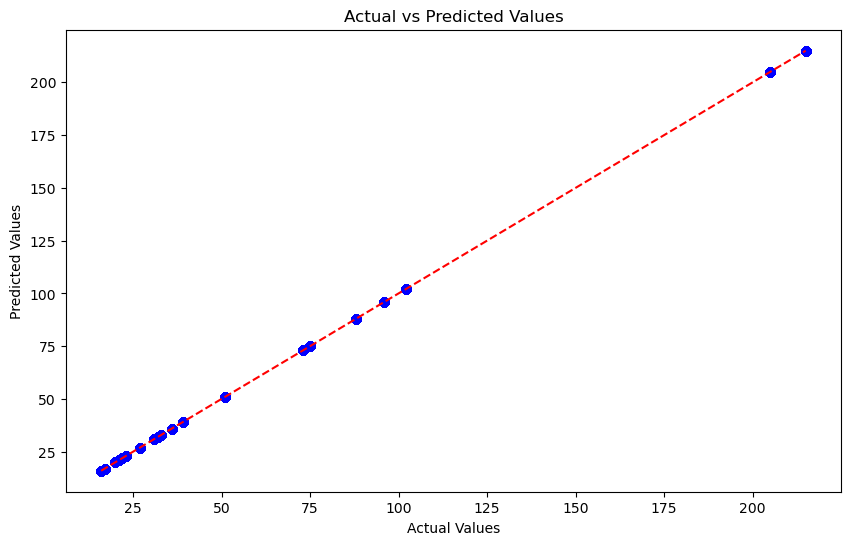

In [6]:
import matplotlib.pyplot as plt

# Assuming y_test contains the actual values and y_pred_lstm contains the predicted values

# Plotting the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_lstm, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red')  # Diagonal line for reference
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()


In [10]:
from keras.models import Sequential, load_model
from keras.layers import LSTM, Dense

# Assuming lstm_model is your trained LSTM model
lstm_model = Sequential()
lstm_model.add(LSTM(units=50, activation='relu', input_shape=(X_train_rnn.shape[1], 1)))
lstm_model.add(Dense(units=1))

# Compile and train the LSTM model

# Save the model to a file
#lstm_model.save('lstm_model.h5')

# Save the model in the native Keras format
lstm_model.save('my_model.keras')


# Load the model from the file
#loaded_lstm_model = load_model('lstm_model.h5')


In [7]:
loaded_lstm_model = load_model('my_model.keras')


In [8]:
# Load the model from the file
loaded_gb_model = joblib.load('gb_regressor_model.pkl')


In [5]:
import joblib

# Load your trained models
def load_models():
    # Load Gradient Boosting Regressor model
    gb_model = joblib.load('gb_regressor_model.pkl')  # Load the saved model (adjust the path)

    # Load LSTM model
    lstm_model = load_model('my_model.keras')  # Load the saved model (adjust the path)

    return gb_model, lstm_model


In [6]:
from keras.models import load_model

# Load your trained models
def load_models():
    # Load Gradient Boosting Regressor model
    gb_model = joblib.load('gb_regressor_model.pkl')  # Load the saved model (adjust the path)

    # Load LSTM model
    lstm_model = load_model('my_model.keras')  # Load the saved model (adjust the path)

    return gb_model, lstm_model


In [7]:
import pandas as pd

fire_data = pd.read_csv('classified_data2.csv')

In [9]:
import pandas as pd
import numpy as np

# Function to predict fire occurrence, LISA cluster, and chances of occurrence
def predict_fire(fire_data, gb_model, lstm_model):
    # Convert weather_data dictionary to DataFrame or 2D array
    input_df = pd.DataFrame([fire_data])  # Convert dictionary to DataFrame
    
    # Predictions
    fire_occurrence = gb_model.predict(input_df)  # Assuming gb_model requires a DataFrame
    lisa_cluster = gb_model.predict(input_df)  # Example, adjust as needed
    chances_of_occurrence = lstm_model.predict(input_df)  # Assuming lstm_model requires a DataFrame
    
    # Combine predictions or format output as needed
    prediction_result = {
        'Fire_Occurrence': fire_occurrence,
        'LISA_Cluster': lisa_cluster,
        'Chances_of_Occurrence': chances_of_occurrence
    }
    
    return prediction_result

# Example input data
weather_input = {
    'latitude': 0.3,
    'longitude':37.2,
    'Precipitation': 5.0,  # Example values, adjust as per your data
    'LST': 19.00,
    'TS': 19.20,
    'RelaHum': 73.75,
    'Spechum': 10.74 ,
    'NDVI': 0.6 
}

# Load models
gb_model, lstm_model = load_models()

# Get prediction
prediction = predict_fire(weather_input, gb_model, lstm_model)
print(prediction)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 505ms/step
{'Fire_Occurrence': array([19.59207753]), 'LISA_Cluster': array([19.59207753]), 'Chances_of_Occurrence': array([[-0.3991471]], dtype=float32)}


In [10]:
def predict_fire(fire_data, gb_model, lstm_model):
    # Convert weather_data dictionary to DataFrame or 2D array
    input_df = pd.DataFrame([fire_data])  # Convert dictionary to DataFrame
    
    # Predictions
    fire_occurrence = int(np.round(gb_model.predict(input_df)[0]))  # Round and convert to int
    lisa_cluster = int(np.round(gb_model.predict(input_df)[0]))  # Example, adjust as needed
    chances_of_occurrence = np.round(lstm_model.predict(input_df) * 100, 2)  # Convert to percentage
    
    # Combine predictions or format output as needed
    prediction_result = {
        'Fire_Occurrence': fire_occurrence,
        'LISA_Cluster': lisa_cluster,
        'Chances_of_Occurrence': float(chances_of_occurrence)  # Convert numpy float to Python float
    }
    
    return prediction_result


# Example input data
weather_input = {
    'latitude': 0.3,
    'longitude':37.2,
    'Precipitation': 5.0,  # Example values, adjust as per your data
    'LST': 19.00,
    'TS': 19.20,
    'RelaHum': 73.75,
    'Spechum': 10.74 ,
    'NDVI': 0.6 
}

# Get prediction
prediction = predict_fire(weather_input, gb_model, lstm_model)
print(prediction)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
{'Fire_Occurrence': 20, 'LISA_Cluster': 20, 'Chances_of_Occurrence': -39.90999984741211}


In [26]:
def predict_fire(fire_data, gb_model, lstm_model):
    # Convert weather_data dictionary to DataFrame or 2D array
    input_df = pd.DataFrame([fire_data])  # Convert dictionary to DataFrame
    
    # Predictions
    fire_occurrence = int(np.round(gb_model.predict(input_df)[0]))  # Round and convert to int
    lisa_cluster = int(np.round(gb_model.predict(input_df)[0]))  # Example, adjust as needed
    chances_of_occurrence = float(np.round(lstm_model.predict(input_df) * 100,2))  # Convert to percentage
    
    # Combine predictions or format output as needed
    prediction_result = {
        'Fire_Occurrence': fire_occurrence,
        'LISA_Cluster': lisa_cluster,
        'Chances_of_Occurrence': chances_of_occurrence  # No need to convert again to float here
    }
    
    return prediction_result

#  Example input data
weather_input = {
    'latitude': 0.27,
    'longitude':37.2,
    'Precipitation': 5.0,  # Example values, adjust as per your data
    'LST': 19.00,
    'TS': 19.20,
    'RelaHum': 73.75,
    'Spechum': 10.74 ,
    'NDVI': 0.6 
}

# Get prediction
prediction = predict_fire(weather_input, gb_model, lstm_model)
print(prediction)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
{'Fire_Occurrence': 20, 'LISA_Cluster': 20, 'Chances_of_Occurrence': -39.91999816894531}


In [13]:
def predict_fire(weather_data, gb_model, lstm_model):
    # Convert weather_data dictionary to DataFrame or 2D array
    input_df = pd.DataFrame([weather_data])  # Convert dictionary to DataFrame
    
    # Predictions
    fire_occurrence = int(np.round(gb_model.predict(input_df)[0]))  # Round and convert to int
    lisa_cluster = int(np.round(gb_model.predict(input_df)[0]))  # Example, adjust as needed
    chances_of_occurrence = float(np.round(lstm_model.predict(input_df) * 100, 2))  # Convert to percentage
    
    # Correct LISA cluster prediction
    lisa_cluster = map_cluster_value(lisa_cluster)
    
    # Combine predictions or format output as needed
    prediction_result = {
        'Fire_Occurrence': fire_occurrence,
        'LISA_Cluster': lisa_cluster,
        'Chances_of_Occurrence': chances_of_occurrence  # No need to convert again to float here
    }
    
    return prediction_result

def map_cluster_value(value):
    if value <= 1:
        return 1
    elif value <= 2:
        return 2
    elif value <= 3:
        return 3
    elif value <= 4:
        return 4
    else:
        return 0

# Example input data
weather_input = {
    'latitude': 0.3,
    'longitude':37.2,
    'Precipitation': 5.0,  # Example values, adjust as per your data
    'LST': 19.00,
    'TS': 19.20,
    'RelaHum': 73.75,
    'Spechum': 10.74 ,
    'NDVI': 0.6 
}

# Get prediction
prediction = predict_fire(weather_input, gb_model, lstm_model)
print(prediction)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
{'Fire_Occurrence': 20, 'Chances_of_Occurrence': -39.90999984741211}


In [31]:
def predict_fire(fire_data, gb_model):
    
    input_df = pd.DataFrame([fire_data]) 
    
   
    fire_occurrence = int(np.round(gb_model.predict(input_df)[0]))  
    
    lisa_cluster = int(np.round(gb_model.predict(input_df)[0]))
   
    
   
    prediction_result = {
        'Fire_Occurrence': fire_occurrence,
        'LISA_Cluster': lisa_cluster,
        'Chances_of_Occurrence': None  # Placeholder for LSTM prediction, if needed later
    }
    
    return prediction_result


weather_input = {
    'latitude': 0.27,
    'longitude': 37.2,
    'Precipitation': 5.0,  # Example values, adjust as per your data
    'LST': 19.00,
    'TS': 19.20,
    'RelaHum': 73.75,
    'Spechum': 10.74,
    'NDVI': 0.6 
}


prediction_gb = predict_fire(weather_input, gb_model)
print(prediction_gb)


{'Fire_Occurrence': 20, 'LISA_Cluster': 20, 'Chances_of_Occurrence': None}
